### Keras RNN with LSTM Layers Example

In addition to SimpleRNN, the Keras library provides two different recurrent layers:
    - LSTM
    - GRU

LSTM stands for Long Short Term Memory. A simple RNN layer is prone to the Vanishing Gradients problem i.e. losing information between layers as the network grows deeper and deeper. With LSTM, information from previous layers is retained and carried forward to future layers. 

The values from the early layers are carried forward with transormation matrices that act as activation functions. Essentiall, each layer's output is calculated by also adding the dot product between the carried value and its respective transformation matrix. And summed with the outputs from the previous inputs and state multuplied by their respective activation matrices. 

##### RNN with LSTM example

In [3]:
timesteps=100
input_features=32
output_features=64

In [11]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [12]:
#Loading sequences i.e. moview reviews (a review is a sequence)
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

#Padding sequences:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [13]:
max_features=10000
maxlen=500
batch_size=32

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [15]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [16]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/Applications/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 120s 6ms/step - loss: 0.6795 - acc: 0.5572 - val_loss: 0.6572 - val_acc: 0.5912
Epoch 2/10
20000/20000 [==============================] - 126s 6ms/step - loss: 0.5869 - acc: 0.6900 - val_loss: 0.5453 - val_acc: 0.7306
Epoch 3/10
20000/20000 [==============================] - 124s 6ms/step - loss: 0.4936 - acc: 0.7637 - val_loss: 0.6054 - val_acc: 0.6900
Epoch 4/10
20000/20000 [==============================] - 123s 6ms/step - loss: 0.4295 - acc: 0.8082 - val_loss: 0.4078 - val_acc: 0.8184
Epoch 5/10
20000/20000 [==============================] - 123s 6ms/step - loss: 0.3801 - acc: 0.8364 - val_loss: 0.3884 - val_acc: 0.8302
Epoch 6/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.3511 - acc: 0.8527 - val_loss: 0.3718 - val_acc: 0.8410
Epoch 7/10
20000/20000 [==============================] - 138s 7ms/step - loss: 0.3219 - acc: 0.8686 - val_loss: 0.3219 - v

In [17]:
import matplotlib.pyplot as plt

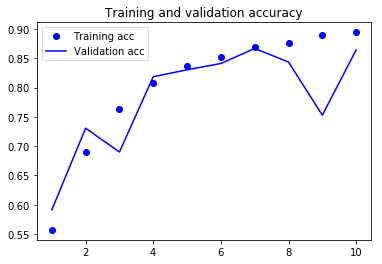

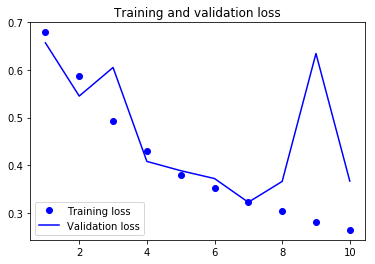

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()